<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%EB%91%90%EC%9E%87_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%9E%85%EB%AC%B8(2)_%EC%8B%9C%EA%B3%84%EC%97%B4(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<02> 시계열 데이터**


## **1. datetime 오브젝트**

* `datetime` 라이브러리: 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 라이브러리
    * `date` 오브젝트: 날짜를 처리
    * `time` 오브젝트: 시간을 처리
    * `datetime` 오브젝트: 날짜와 시간을 모두 처리

---

#### **1-2. datetime 오브젝트로 변환하기 - to_datetime 메서드**

* 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해줘야 함

* `to_datetime`: 문자열을 datetime 오브젝트로 변환

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# ebola 데이터 집합 불러오기
import pandas as pd
import os
from datetime import datetime

ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/country_timeseries.csv')

In [53]:
# Date 열이 문자열로 저장되어 있음
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [54]:
# Date 열의 자료형을 datetime 오브젝트로 변환한 다음 새로운 열로 추가
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [55]:
# 시간 형식 지정자와 기호를 조합하여 format 인자에 전달
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [56]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


>> 시간 형식 지정자: %d, %m, %y

>> 기호: /, -

---

#### **1-3. 시간 형식 지정자**

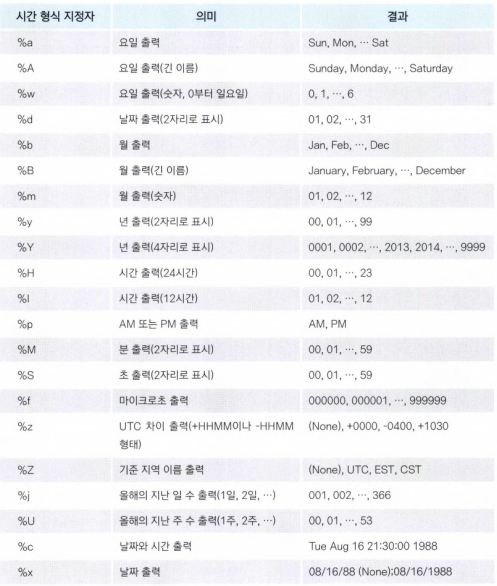

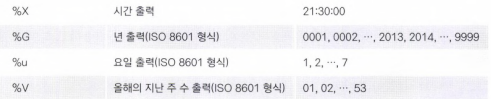

---

#### **1-4. 시계열 데이터를 구분해서 추출**

* `now` 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간을 표현

* `strftime` 메서드 + 시간 형식 지정자: 시계열 데이터 잘라내기

In [57]:
now = datetime.now()
print(now)

2023-04-10 06:39:40.191793


In [58]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

# '%y-%m-%d': 23-04-10

2023-04-10


In [59]:
nowTime = now.strftime('%H:%M:%S')  # 시(24시간):분:초
print(nowTime)

06:39:40


In [60]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2023-04-10 06:39:40


---

#### **1-5. datetime 오브젝트로 변환하기 - read_csv 메서드**

* 데이터 집합을 불러올 때 datetime 오브젝트로 변환하려는 열을 지정하는 것이 더 쉬움

* `read_csv` 메서드의 `parse_dates` 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달

In [61]:
ebola1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

---

#### **1-6. datetime 오브젝트에서 날짜 정보 추출하기**

* datetime 오브젝트에는 날짜 정보를 따로 저장하고 있는 속성이 있음

In [62]:
# 날짜를 datetime 오브젝트로 변환
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [63]:
# year, month, day 속성을 이용하면 년, 월, 일 정보를 바로 추출 가능
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


---

#### **1-7. dt 접근자 사용하기**

* `dt` 접근자: datetime 속성이나 메서드를 사용하여 시계열 데이터 처리 가능

In [64]:
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [65]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [66]:
# dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터 추출
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


In [67]:
# dt 접근자로 date_dt 열에 한 번에 접근 후, year 속성을 이용하여 연도값 추출
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [68]:
# 월, 일 데이터를 한 번에 추출
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [69]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

>> date_dt 열은 datetime 오브젝트

>> 나머지 년, 월, 일은 정수형

---

## **2. 사례별 시계열 데이터 계산하기**

#### **2-6. 에볼라 최초 발병일 계산하기**

In [70]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


>> ebola 데이터프레임은 데이터가 시간 역순으로 되어있음

>> 즉, 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야 함

In [71]:
# min 메서드를 사용하여 에볼라의 최초 발병일 찾기
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [72]:
# 에볼라의 진행 정도: Date 열 - 에볼라의 최초 발병일
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


---

#### **2-7. 파산한 은행의 개수 계산하기**

* 분기별로 파산한 은행이 얼마나 되는지 계산해보기

In [74]:
banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


>> 'Closing Date', 'Updated Date' 열이 시계열 데이터라는 것을 알 수 있음

In [75]:
banks_no_dates = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


>> 'Closing Date', 'Updated Date' 열의 데이터 자료형은 문자열임

In [76]:
# parse_dates 속성을 이용하여 두 열을 datetime 오브젝트로 변환하여 불러옴
banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [82]:
# dt 접근자와 quarter, year 속성을 이용해 은행이 파산한 분기와 연도 추출
banks['closing_quarter'], banks['closing_year'] = (
    banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closong_year  closing_year  
0                4          2017          2017  
1           

In [83]:
# 연도별 파산한 은행 수 (groupby)
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [84]:
# 연도별, 분기별 파산한 은행 수 (연도별로 그룹화한 다음 다시 분기별로 그룹화)
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

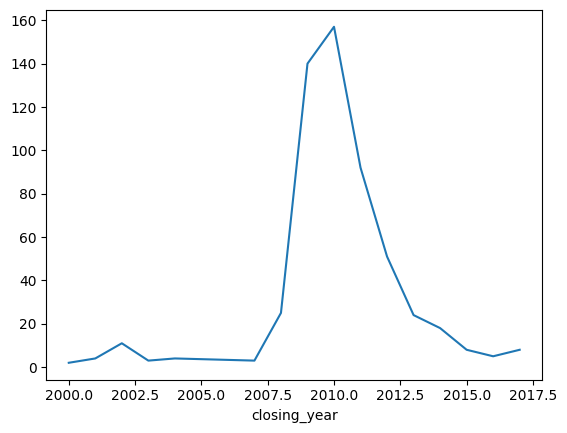

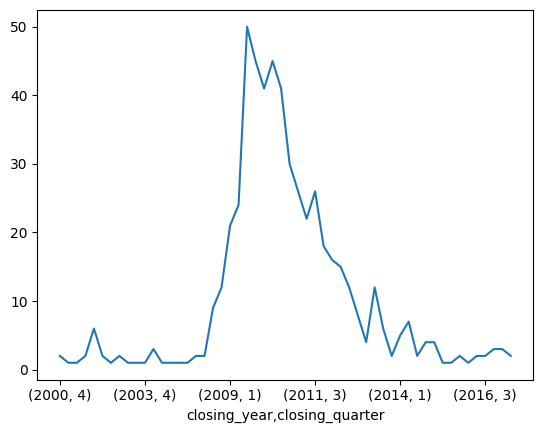

In [86]:
# 그래프
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

#### **2-8. 시간 범위 수정하고 데이터 밀어내기 - shift 메서드**

* 나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 좋음

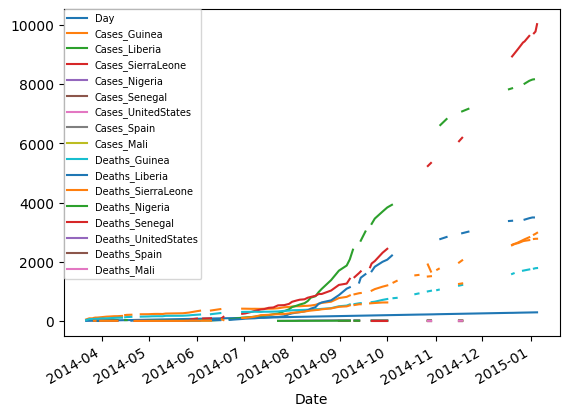

In [104]:
# Date 열을 인덱스로 지정한 다음 x축을 Date열로, y축을 사망자 수로 지정한 그래프
import matplotlib.pyplot as plt
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/country_timeseries.csv',parse_dates=[0])
ebola.index = ebola['Date']

fig, ax = plt.subplots( )
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

>> 각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점도 다름

>> 각 나라의 발병일을 가장 처음 에볼라가 발병한 'Guinea'와 동일한 위치로 옮겨야 에볼라의 확산 속도를 제대로 비교할 수 있음

In [99]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [112]:
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/country_timeseries.csv',parse_dates=['Date'])
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


>> 중간에 누락된 날짜가 있다는 것을 알 수 있음(2015-01-01)

>> 이를 포함시켜야 확산 속도를 제대로 비교할 수 있음

In [113]:
# Date 열을 인덱스로 지정
# 인덱스의 최댓값과 최솟값으로 시간 범위를 생성하여 저장
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

>> 이렇게 하면 날짜가 아예 없었던 데이터의 인덱스를 생성할 수 있음

In [114]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


>> 데이터에 있는 시간 순서와 반대로 되어있음

In [115]:
# 인덱스를 반대로 뒤집음
new_idx = reversed(new_idx)

In [116]:
# reindex를 사용하여 인덱스를 새로 지정
ebola = ebola.reindex(new_idx) 
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

>> ebola 데이터프레임에 아예 없었던 날짜가 추가됨(2015-01-01)

>> 시간에 대한 누락값은 NaT

In [117]:
# last_valid_index: 유효한 값이 있는 마지막 인덱스 반환(가장 오래된 데이터)
last_valid = ebola.apply(pd.Series.last_valid_index) 
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [118]:
# first_valid_index: 유효한 값이 있는 첫번째 인덱스 반환(가장 최근 데이터)
first_valid = ebola.apply(pd.Series.first_valid_index) 
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [119]:
# 에볼라가 가장 처음 발병한 날
earliest_date = ebola.index.min() 
print(earliest_date)

2014-03-22 00:00:00


In [120]:
# 발병일 차이 구하기
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [125]:
ebola_dict = {}
for idx, col in enumerate(ebola): 
    d = shift_values[idx].days 
    shifted = ebola[col].shift(d) 
    ebola_dict[col] = shifted

In [126]:
ebola_shift = pd.DataFrame(ebola_dict)

In [127]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [129]:
ebola_shift.index = ebola_shift['Day'] 
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

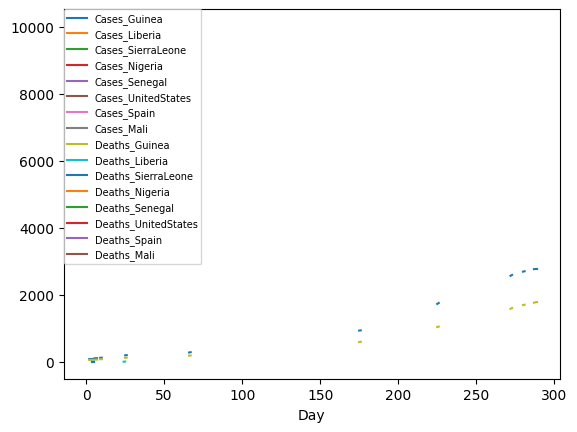

In [131]:
fig, ax = plt.subplots( ) 
ax = ebola_shift.iloc[:, :].plot(ax=ax) 
ax.legend(fontsize=7, loc=2, borderaxespad=0.) 
plt.show( )

>> 